<a href="https://colab.research.google.com/github/diegooo9/mat281_portfolio_2022/blob/master/labs/lab_09/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_09/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09



<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [46]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [47]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_09/data/BC.csv", sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0}) # target 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:

1. Realice un análisis exploratorio del conjunto de datos.
1. Normalizar las variables numéricas con el método **StandardScaler**.
3. Realizar un método de reducción de dimensionalidad visto en clases.
4. Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.




                    columna  unicos  nulos
0                        id     569      0
1                 diagnosis       2      0
2               radius_mean     456      0
3              texture_mean     479      0
4            perimeter_mean     522      0
5                 area_mean     539      0
6           smoothness_mean     474      0
7          compactness_mean     537      0
8            concavity_mean     537      0
9       concave points_mean     542      0
10            symmetry_mean     432      0
11   fractal_dimension_mean     499      0
12                radius_se     540      0
13               texture_se     519      0
14             perimeter_se     533      0
15                  area_se     528      0
16            smoothness_se     547      0
17           compactness_se     541      0
18             concavity_se     533      0
19        concave points_se     507      0
20              symmetry_se     498      0
21     fractal_dimension_se     545      0
22         

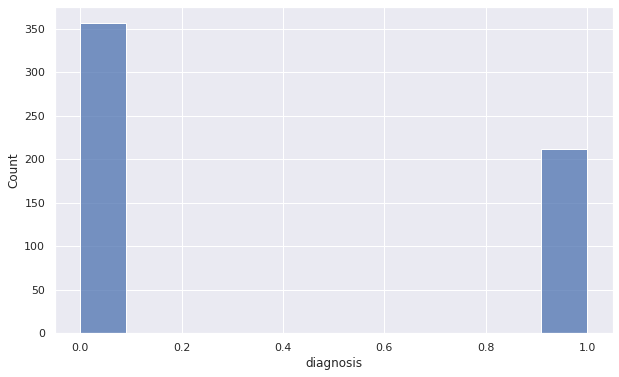

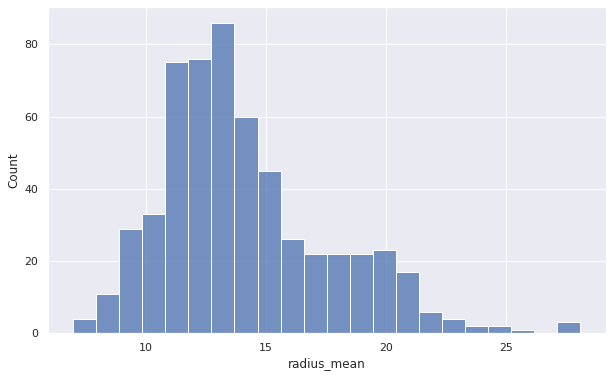

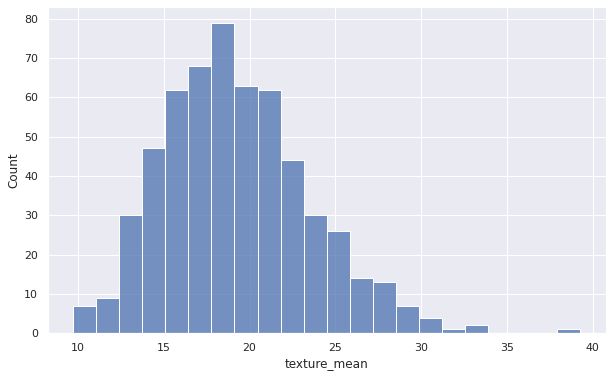

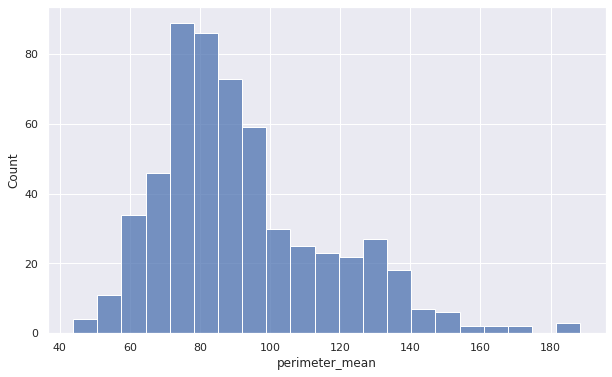

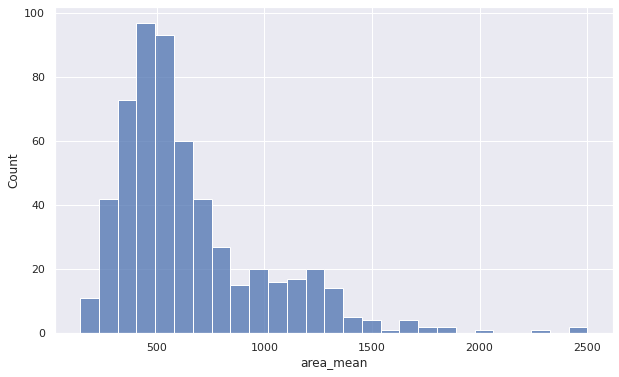

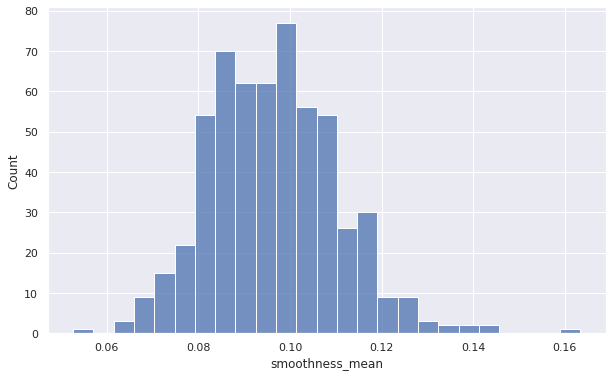

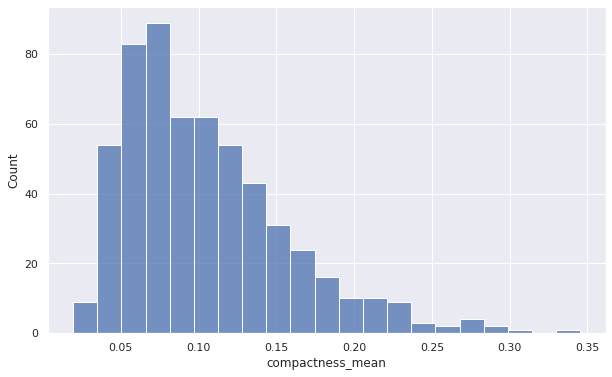

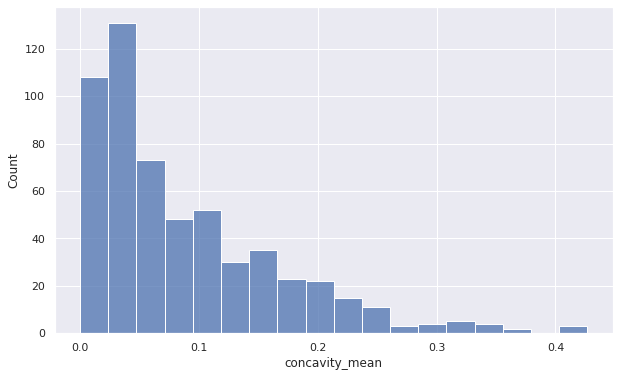

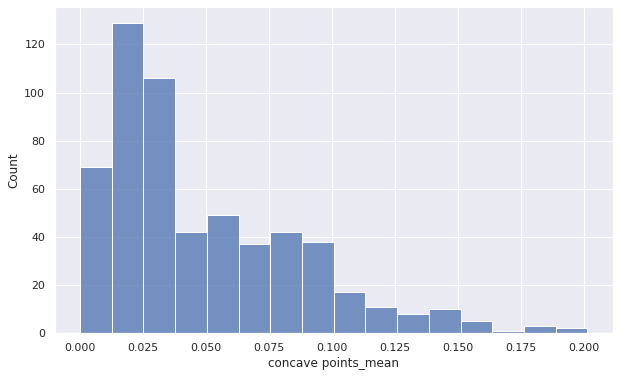

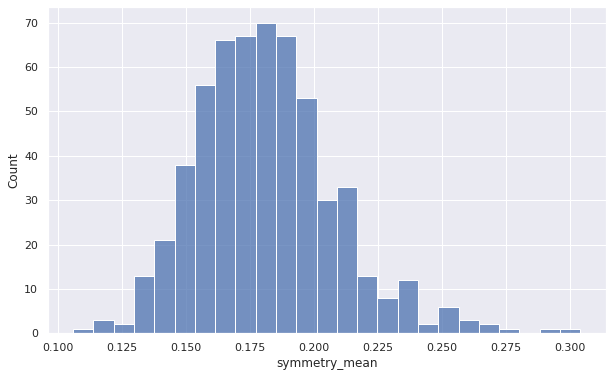

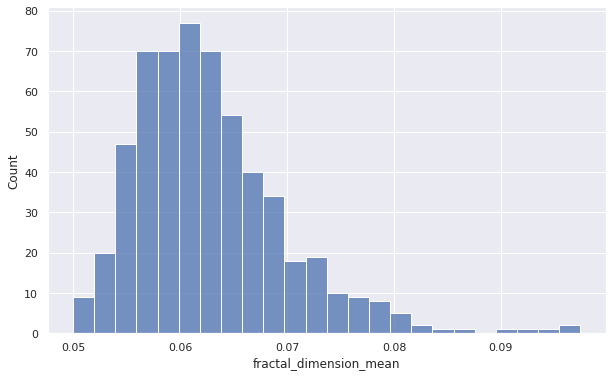

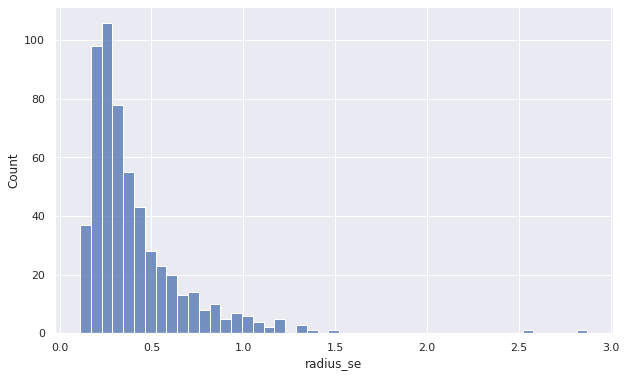

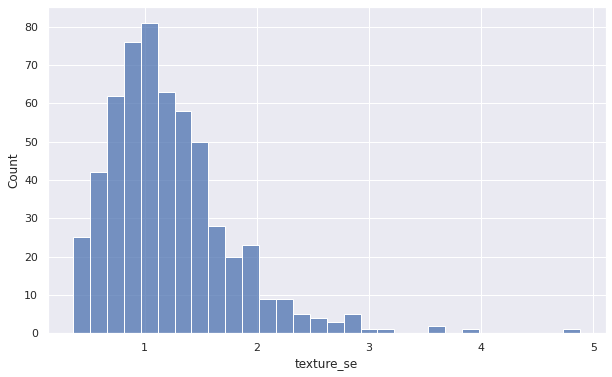

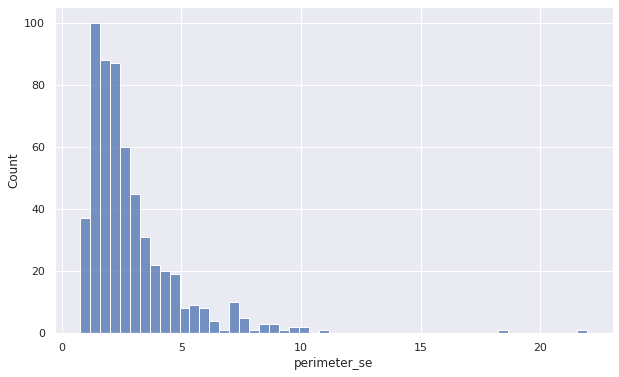

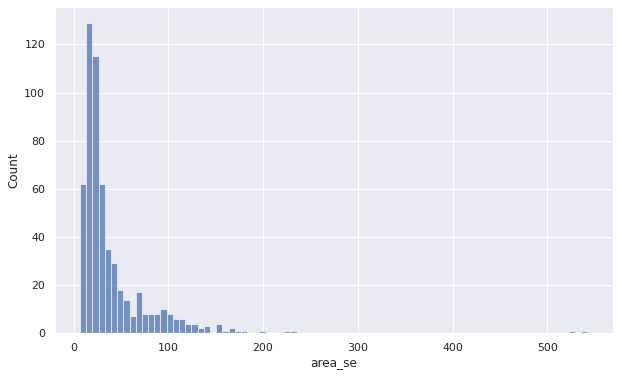

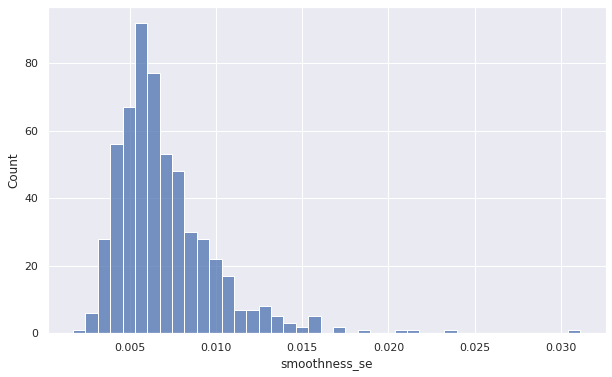

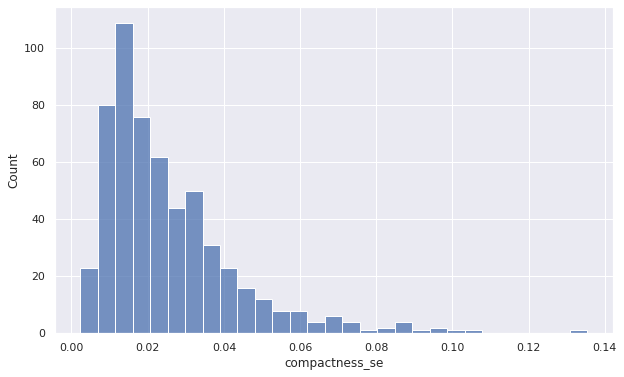

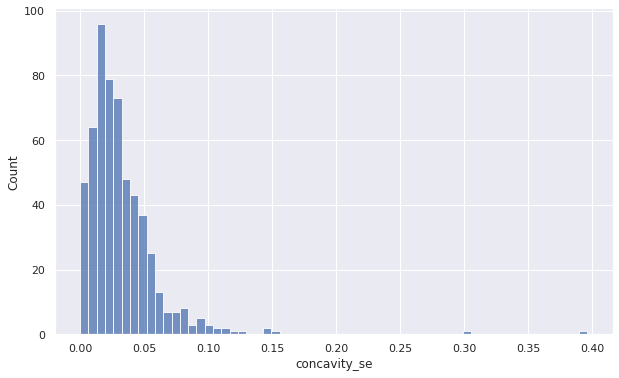

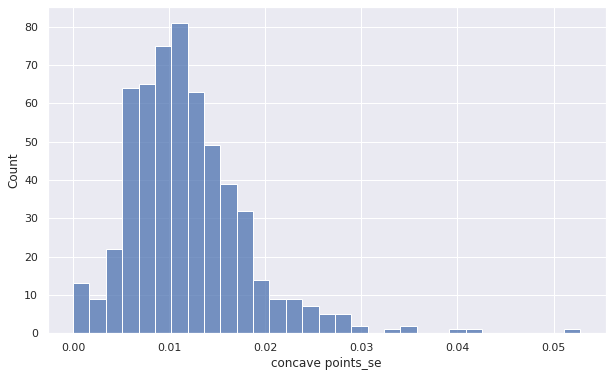

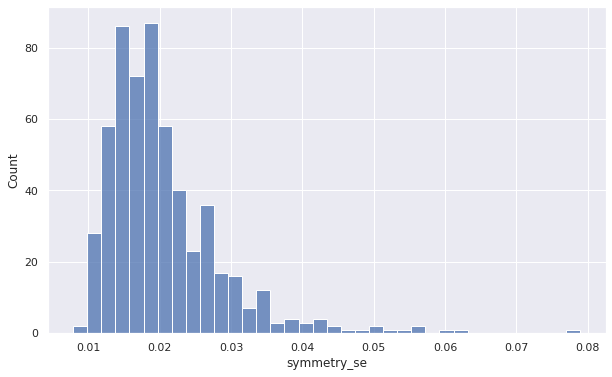

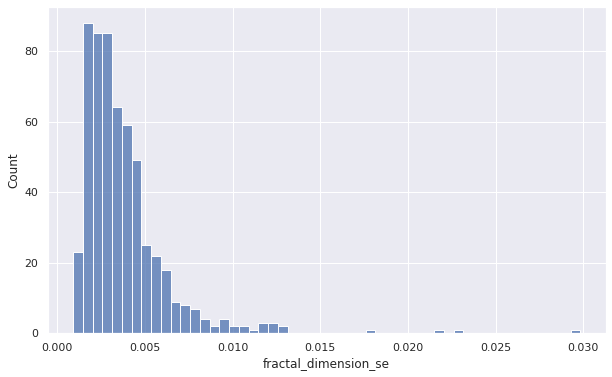

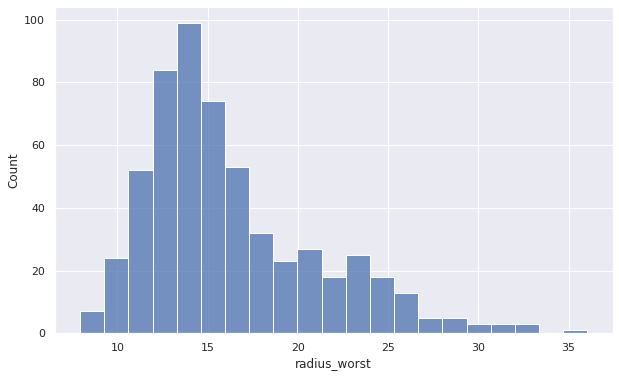

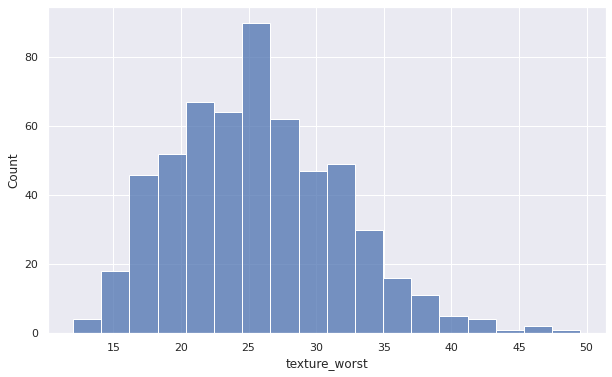

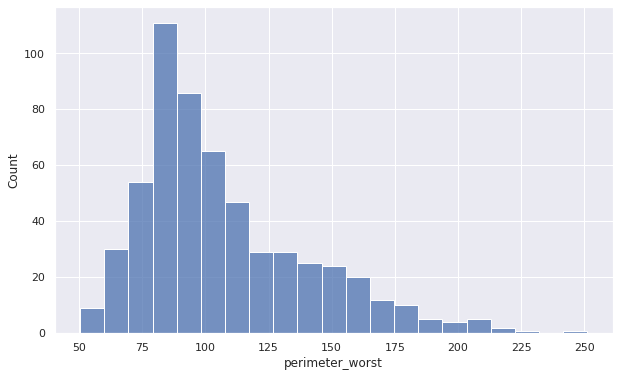

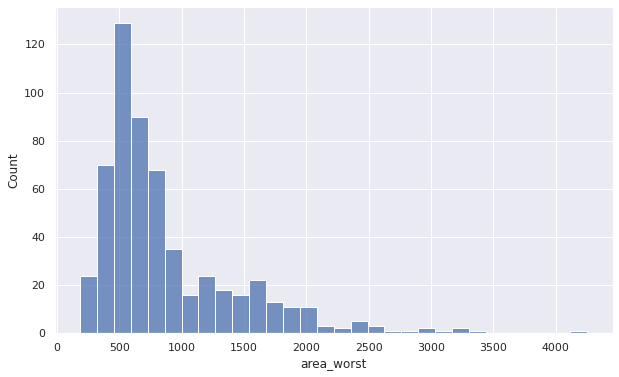

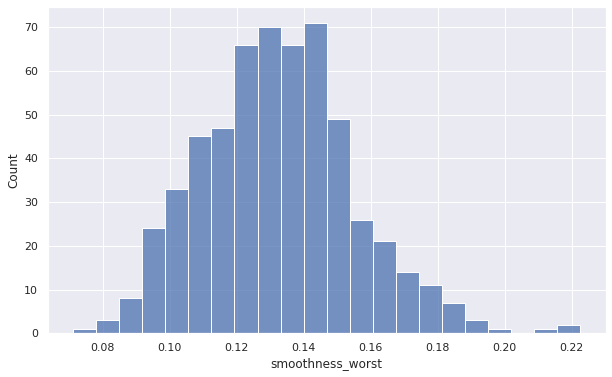

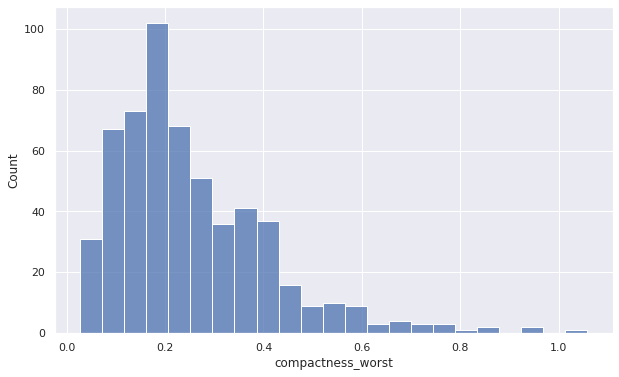

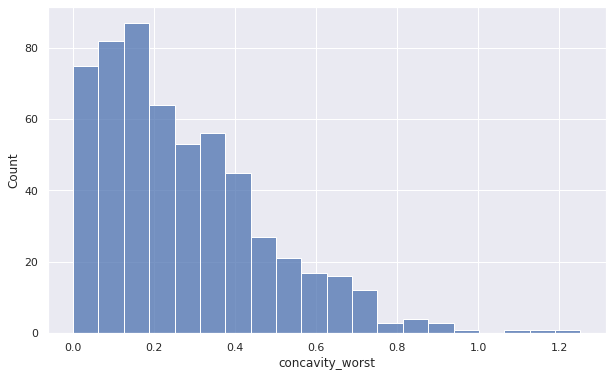

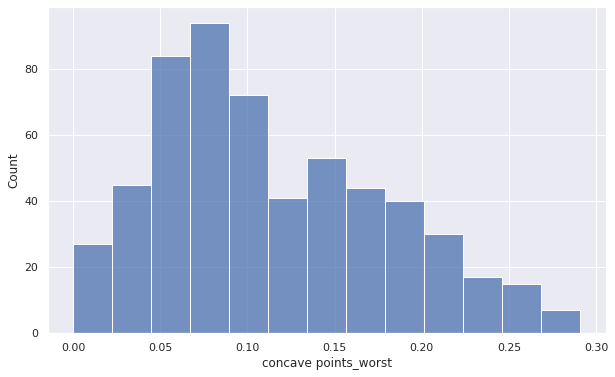

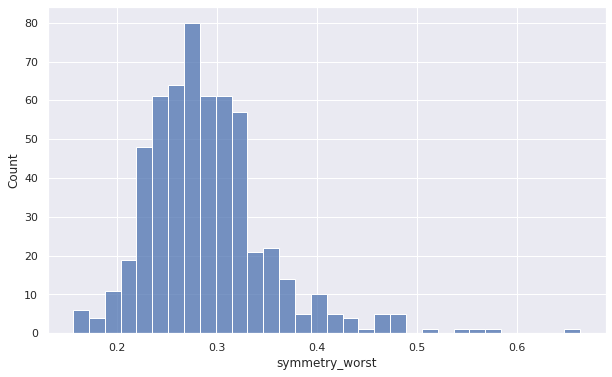

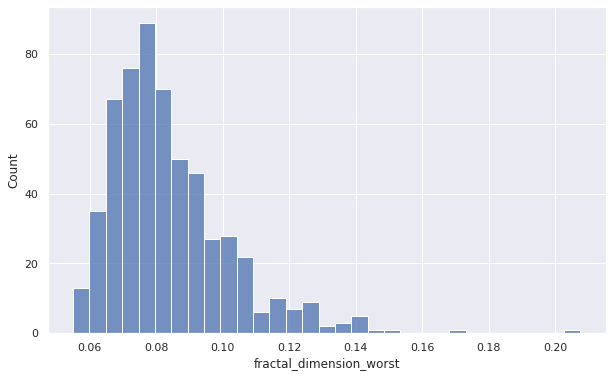

      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
PC1      0.218902      0.103725        0.227537   0.220995         0.142590   
PC2     -0.233857     -0.059706       -0.215181  -0.231077         0.186113   
PC3     -0.008531      0.064550       -0.009314   0.028700        -0.104292   
PC4      0.041409     -0.603050        0.041983   0.053434         0.159383   
PC5      0.037786     -0.049469        0.037375   0.010331        -0.365089   
PC6      0.018741     -0.032179        0.017308  -0.001888        -0.286374   
PC7     -0.124088      0.011400       -0.114477  -0.051653        -0.140669   
PC8     -0.007452      0.130675       -0.018687   0.034674        -0.288975   
PC9     -0.223110      0.112699       -0.223739  -0.195586         0.006425   
PC10     0.095486      0.240934        0.086386   0.074956        -0.069293   
PC11     0.041471     -0.302243        0.016783   0.110170        -0.137022   
PC12     0.051067      0.254896        0.038926   0.

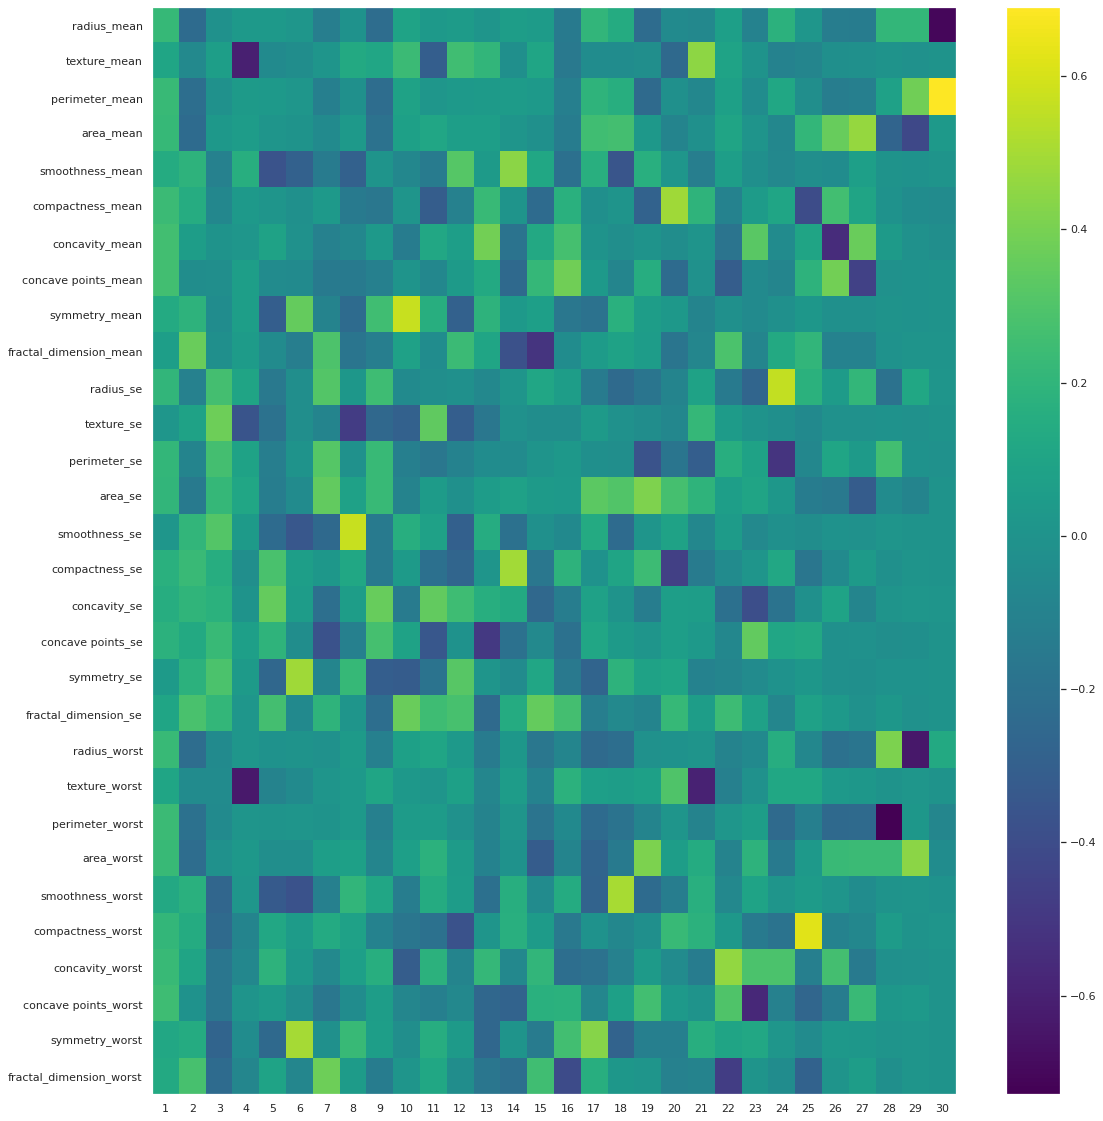

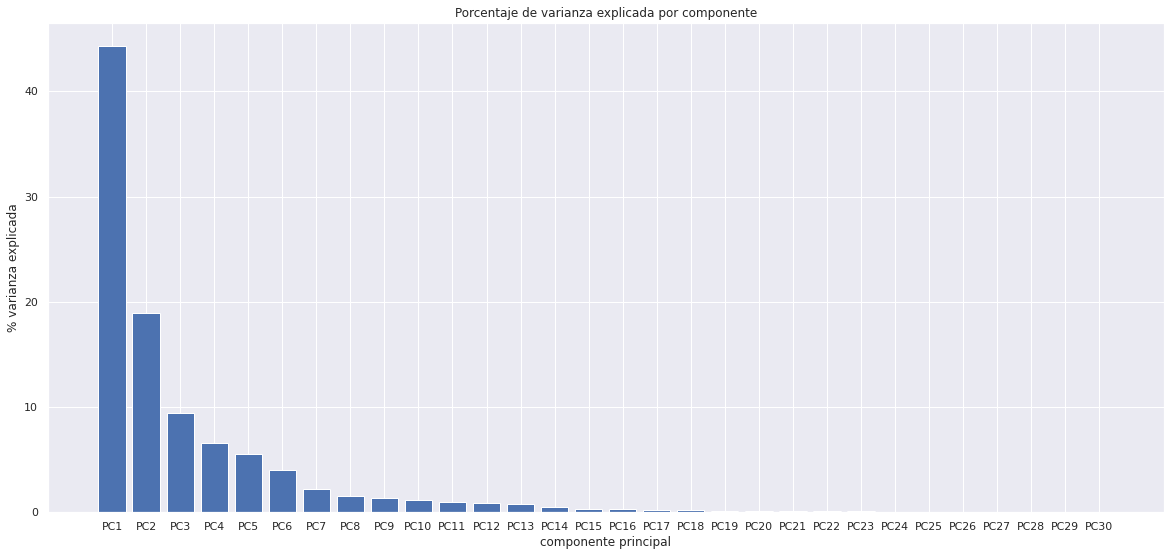

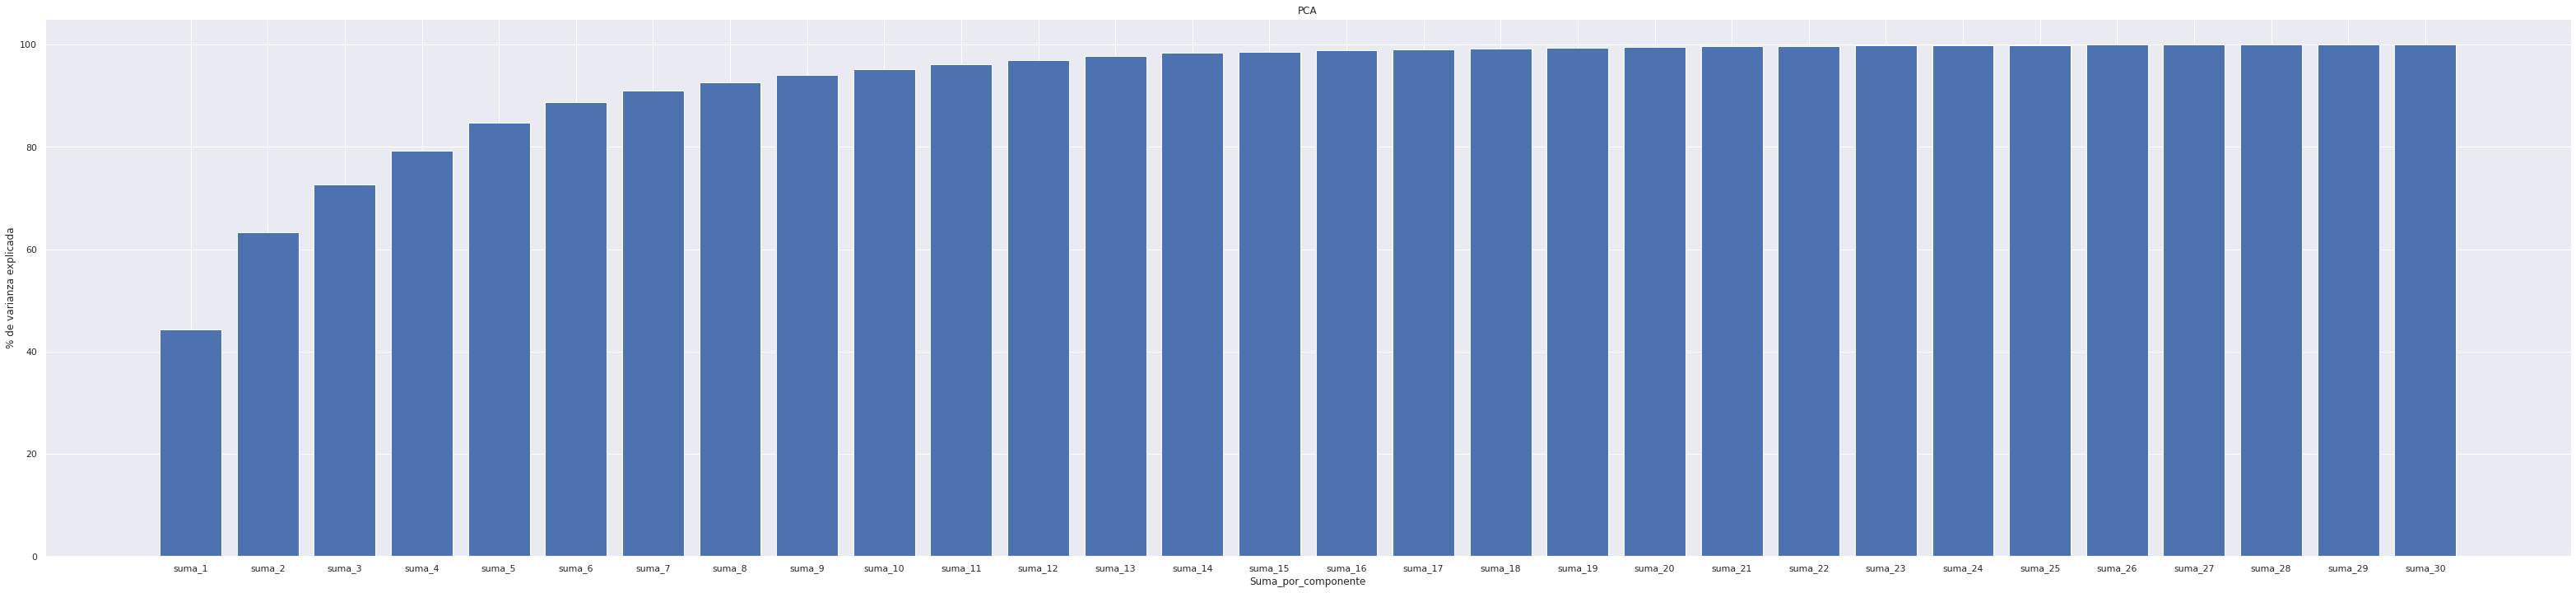

In [56]:
def resumen_por_columna(df,cols):
  serie_column=df[cols]
  unicos=serie_column.unique()
  nulos=serie_column[serie_column.isnull()]
  df_info=pd.DataFrame({
      "columna":[cols],
      "unicos":[len(unicos)],
      "nulos":[len(nulos)]
  })
  return df_info
frames=[]
for columna in df.columns:
  aux_df=resumen_por_columna(df,columna)
  frames.append(aux_df)
info=pd.concat(frames).reset_index(drop=True)
print(info)
print(df.describe())
print(df.var(axis=0))
tipo_col=df.dtypes
print(df.corr())
palette=sns.color_palette("hls",2)
for j, col in enumerate(pd.Series(df.columns).drop(index=[0])):
  plt.figure(figsize=(10,6))
  sns.histplot(df[col])
  plt.show()
num_col=[]
for i in range(len(df.columns)):
  if i>1:
    num_col.append(df.columns[i])
df2=df.set_index(["id","diagnosis"])
pca_pipe=make_pipeline(StandardScaler(),PCA())
pca_pipe.fit(df2)
modelo_pca=pca_pipe.named_steps["pca"]
df_new=pd.DataFrame(
    data=modelo_pca.components_,
    columns=num_col,
    index= [ "PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12","PC13","PC14","PC15","PC16","PC17","PC18","PC19","PC20","PC21","PC22","PC23","PC24","PC25","PC26","PC27","PC28","PC29","PC30"]
)
print(df_new)
plt.figure(figsize=(18,20))
componentes=modelo_pca.components_
plt.imshow(componentes.T,cmap="viridis",aspect="auto")
plt.yticks(range(len(num_col)),num_col)
plt.xticks(range(len(num_col)),np.arange(modelo_pca.n_components_)+1)
plt.grid(False)
plt.colorbar()
percent_variance=np.round(modelo_pca.explained_variance_ratio_*100,decimals=4)
columnas=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12","PC13","PC14","PC15","PC16","PC17","PC18","PC19","PC20","PC21","PC22","PC23","PC24","PC25","PC26","PC27","PC28","PC29","PC30"]
plt.figure(figsize=(20,9))
plt.bar(x=range(1,31),height=percent_variance,tick_label=columnas)
plt.xticks(np.arange(modelo_pca.n_components_)+1)
plt.ylabel("% varianza explicada")
plt.xlabel("componente principal")
plt.title("Porcentaje de varianza explicada por componente")
plt.show()
percent_variance_cum=np.cumsum(percent_variance)
columns=["suma_1","suma_2","suma_3","suma_4","suma_5","suma_6","suma_7","suma_8","suma_9","suma_10","suma_11","suma_12","suma_13","suma_14","suma_15","suma_16","suma_17","suma_18","suma_19","suma_20","suma_21","suma_22","suma_23","suma_24","suma_25","suma_26","suma_27","suma_28","suma_29","suma_30"]
plt.figure(figsize=(55,12))
plt.bar(x=range(1,31),height=percent_variance_cum,tick_label=columns)
plt.ylabel("% de varianza explicada")
plt.xlabel("Suma_por_componente")
plt.title("PCA")
plt.show()



De este ultimo grafico es inferible que un buen numero de componentes principales, para asi representar el fenomeno con la menor cantidad de variables posibles sin perdida considerable de informacion, es de 9, ya que con esta cantidad de componentes se explica casi el 90% de la varianza.